### Hoestar_PD_Assignment

Objective:

-detect any outliers from among the data

-detect any direct relationships among the parameters

-detect any anomalies arising from the data.

This is a set of real data collected over time which is unlabelled comprising various parameters to determine the condition of a group of equipment(3 types but of different makes coming from different suppliers in the form of equipment ID).The type of equipment is an important factor to consider to see which are the normal ones and which are the one that need to be monitored with suspected unhealthy conditions.The equipment of the same type will have the similar behavious but they are not so important in the outcome which we want to see. Also,we would like to know if there is any correlation among the parameters in a way a change in one parameter will affect another.

The PD average magnitude and PD count measures the equipment health and they can be affected by the other parameters(as shown) in which the equipment are operating in.You can use whatever method you deem fit,be it statistics,ML or AI tools to make your results and conclusions.It is good to show by visualisation on how you arrive at your conclusion.

#### Import Modules

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as ws
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Load the dataset

In [2]:
def file():
    df = pd.read_csv("PD data.csv")  #Load the dataset
    
    return df

file()

,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading
0,8558,424.19,19,27.0,56.0,250.0
1,8559,565.25,12,27.0,56.0,250.0
2,9244,1881.07,6,29.2,71.6,300.0
3,9379,774.28,14,26.3,71.5,585.0
4,9490,502.98,20,27.2,62.4,700.0
5,9500,3202.67,13,32.0,51.3,850.0
6,9501,3032.09,14,32.0,51.3,850.0
7,9499,3709.10,13,32.0,51.3,850.0
8,9747,1011.00,20,30.1,59.6,15.0
9,9749,1060.00,28,30.1,59.6,5.0


#### Data cleaning and pre-processing

Handling missing values and explore the data.

In [3]:
def handleMis():    #Handling missing values:
    #include all possible missing values  
    misVal = ["Na","n/a", "na", "-", "?"]
    df = pd.read_csv("PD data.csv", na_values = misVal, sep = ",")
    print("\nNumber of instances: {}".format(df.shape[0]))    #find number of rows and columns
    print("Number of columns: {}\n".format(df.shape[1]))
    df.replace(misVal, np.NaN, inplace=True)     #replace all missing values as NaN 
    df.columns = df.columns.str.strip()
    print("{}\n".format(df.head()))     
    print("{}\n".format(df.info()))             #check columns with non-numerical values
    print("{}\n".format(df.isna().sum()))       #check if there is any null values 
    
    return df

df = handleMis()


Number of instances: 559
Number of columns: 6

   Equipment ID  PD Average  PD Count  Temperature  Humidity  Loading
0          8558      424.19        19         27.0      56.0    250.0
1          8559      565.25        12         27.0      56.0    250.0
2          9244     1881.07         6         29.2      71.6    300.0
3          9379      774.28        14         26.3      71.5    585.0
4          9490      502.98        20         27.2      62.4    700.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Equipment ID    559 non-null int64
PD Average      559 non-null float64
PD Count        559 non-null int64
Temperature     559 non-null float64
Humidity        559 non-null float64
Loading         559 non-null float64
dtypes: float64(4), int64(2)
memory usage: 26.3 KB
None

Equipment ID    0
PD Average      0
PD Count        0
Temperature     0
Humidity        0
Loading         0
dtype: int64



Remove duplicated rows if any.

In [4]:
def dup():
    print("{}\n".format(df[df.duplicated()]))     #Check for duplicated rows:
    print("Number of Duplicated rows:{}\n".format(df.duplicated().sum()))
    #There are no duplicated rows, No need df1.drop_duplicates().
    
dup()

Empty DataFrame
Columns: [Equipment ID, PD Average, PD Count, Temperature, Humidity, Loading]
Index: []

Number of Duplicated rows:0



Drop Equipment ID column which is not of use.

In [5]:
df1 = df.drop(columns="Equipment ID")
df1.describe()  #Summary statistics of the dataset

,PD Average,PD Count,Temperature,Humidity,Loading
count,559.000000,559.000000,559.000000,559.000000,559.000000
mean,683.493864,14.395349,29.149374,60.695832,350.438927
std,730.720851,10.286194,3.480390,12.083263,624.791790
min,35.610000,1.000000,21.900000,37.180000,0.000000
25%,106.835000,7.000000,25.700000,52.890000,5.000000
50%,323.740000,12.000000,29.400000,61.100000,27.170000
75%,1137.920000,18.000000,32.000000,68.550000,457.000000
max,4891.420000,66.000000,39.900000,87.900000,2459.000000


#### Data Visualisation

Plot box plot.

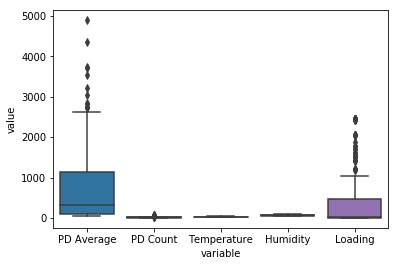

In [6]:
def comb_box_plot():
    sns.boxplot(x="variable", y="value", data=pd.melt(df1))  #combine the column data and visualise using box plot
    plt.show()
    
comb_box_plot()

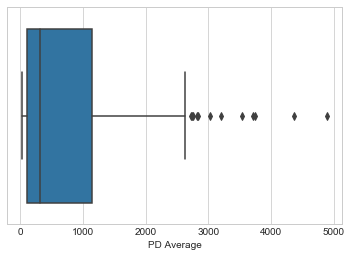

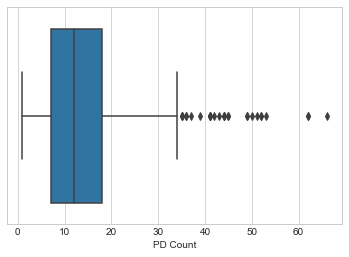

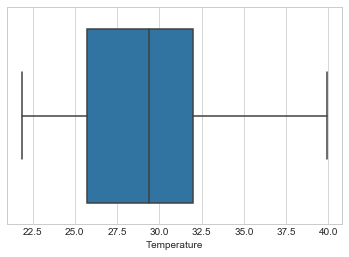

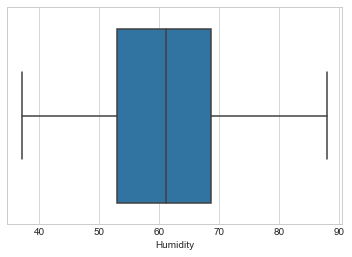

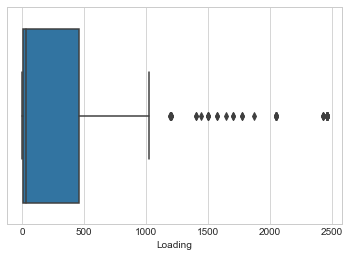

In [7]:
def box_plot(data, cols):                  
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, data=data)  ##plot boxplot for all columns except Equipment ID
        plt.xlabel(col)              #set text for the x axis
        plt.show()
        
columns = ["PD Average", "PD Count", "Temperature", "Humidity", "Loading"]
box_plot(df1, columns)    

Plot Histogram.

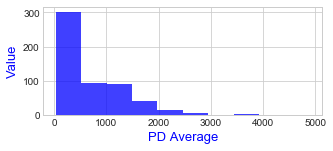

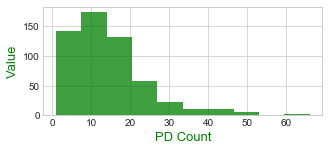

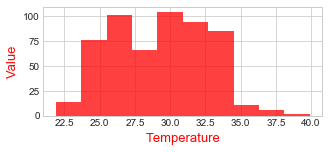

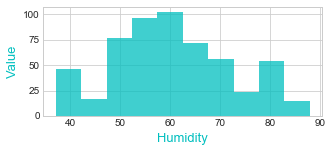

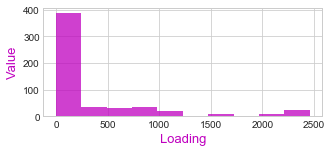

In [8]:
def histo():  #plot histogram for all columns except Equipment ID, to see the frequency of the column values
    
    col1 = df1["PD Average"]
    col2 = df1["PD Count"] 
    col3 = df1["Temperature"] 
    col4 = df1["Humidity"] 
    col5 = df1["Loading"]

    plt.figure(1,figsize=(5,2)) 
    plt.hist(col1, color="b", alpha=0.75)
    plt.xlabel("PD Average",color="b",fontsize=13)
    plt.ylabel("Value",color="b",fontsize=13)

    plt.figure(2,figsize=(5,2)) 
    plt.hist(col2, color="g",alpha=0.75)
    plt.xlabel("PD Count",color="g",fontsize=13)
    plt.ylabel("Value",color="g",fontsize=13)

    plt.figure(3,figsize=(5,2)) 
    plt.hist(col3, color="r",alpha=0.75)
    plt.xlabel("Temperature",color="r",fontsize=13)
    plt.ylabel("Value",color="r",fontsize=13)

    plt.figure(4,figsize=(5,2)) 
    plt.hist(col4, color="c",alpha=0.75)
    plt.xlabel("Humidity",color="c",fontsize=13)
    plt.ylabel("Value",color="c",fontsize=13)

    plt.figure(5,figsize=(5,2)) 
    plt.hist(col5, color="m",alpha=0.75)
    plt.xlabel("Loading",color="m",fontsize=13)
    plt.ylabel("Value",color="m",fontsize=13)

    plt.show()
    
histo()

We can see that there are outliers in three different parameter from the box plot. We will proceed to remove them.

In [9]:
def remove_out(df1):
    #filter values with z score larger than -3 and smaller than 3
    print('Number of rows before discarding outliers = {}'.format(df1.shape[0]))    
    df1 = df1[df1.apply(lambda x: np.abs(x - x.mean()) / x.std() <= 3).all(axis=1)]
    df1 = df1[df1.apply(lambda x: np.abs(x - x.mean()) / x.std() > -3).all(axis=1)]
    print('Number of rows after discarding outliers = {}'.format(df1.shape[0]))
    return df1

df1 = remove_out(df1)
df1

Number of rows before discarding outliers = 559
Number of rows after discarding outliers = 517


,PD Average,PD Count,Temperature,Humidity,Loading
0,424.19,19,27.0,56.0,250.0
1,565.25,12,27.0,56.0,250.0
2,1881.07,6,29.2,71.6,300.0
3,774.28,14,26.3,71.5,585.0
4,502.98,20,27.2,62.4,700.0
8,1011.00,20,30.1,59.6,15.0
9,1060.00,28,30.1,59.6,5.0
10,1100.00,11,30.1,59.6,5.0
11,964.00,15,30.1,59.6,15.0
12,1366.03,28,30.4,67.6,1641.0


#### Association of parameters

Correlation Matrix

In [10]:
def corr():
    feature_columns = [x for x in df1.columns]
    corr_mat = df1[feature_columns].corr().round(4)   # The correlation matrix
    for x in range(len(feature_columns)):   # Strip out the diagonal values for the next step
        corr_mat.iloc[x,x] = 0.0
        
    return corr_mat, feature_columns
    
corr_mat, feature_columns = corr()   #Look for values -0.9 or 0.9 which s highly corr
corr_mat

,PD Average,PD Count,Temperature,Humidity,Loading
PD Average,0.0000,0.3277,0.0631,-0.0156,0.2328
PD Count,0.3277,0.0000,0.0112,-0.0500,0.2493
Temperature,0.0631,0.0112,0.0000,-0.1878,-0.0044
Humidity,-0.0156,-0.0500,-0.1878,0.0000,-0.0373
Loading,0.2328,0.2493,-0.0044,-0.0373,0.0000


| # | Correlation |  Meaning   |
|---|-------------|------------|
| 1 |  0.0 - 0.1  | Negligible |
| 2 |  0.1 - 0.3  |   Small    |
| 3 |  0.3 - 0.5  |   Medium   |
| 4 |    0.5 +    |   Large    |

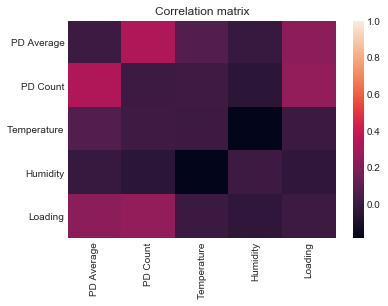

In [11]:
def corr_plot():
    #Plot heatmap for visualisation of corr between the parameters
    sns.heatmap(corr_mat, vmax=1.0) 
    plt.title("Correlation matrix")
    plt.yticks(rotation="horizontal")
    plt.xticks(rotation="vertical")
    
corr_plot()

In [12]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

PD Average        PD Count
PD Count        PD Average
Temperature       Humidity
Humidity       Temperature
Loading           PD Count
dtype: object

In [13]:
skew_columns = (df1[feature_columns].skew().sort_values(ascending=False))  

skew_columns = skew_columns.loc[skew_columns > 0.75]    #Checking the skewness of columns more than 0.75
skew_columns

Loading       2.239302
PD Average    1.289251
PD Count      1.193523
dtype: float64

Compute CI and p-value between the correlated parameters.

In [14]:
def r_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

def correlation_sig2(df1, col1, col2):
    pearson_cor = ss.pearsonr(x = df1[col1], y = df1[col2]) 
    conf_ints = r_conf_int(pearson_cor[0], 0.05, 1000)
    print('Correlation with ' + col2 + ' = %4.3f with CI of %4.3f to %4.3f and p_value %4.3e' 
        % (pearson_cor[0], conf_ints[0], conf_ints[1], pearson_cor[1]))

def test_significance(df, col_list):
    cols = df.columns
    for col1 in col_list: 
        print("\n")
        print("Significance of correlations with " + col1)
        for col2 in cols: 
            if(col1 != col2):
                correlation_sig2(df, col1, col2)  

test_cols = ["PD Average", "PD Count", "Temperature", "Humidity", "Loading"]
test_significance(df1, test_cols)



Significance of correlations with PD Average
Correlation with PD Count = 0.328 with CI of 0.271 to 0.382 and p_value 2.094e-14
Correlation with Temperature = 0.063 with CI of 0.001 to 0.125 and p_value 1.522e-01
Correlation with Humidity = -0.016 with CI of -0.077 to 0.046 and p_value 7.242e-01
Correlation with Loading = 0.233 with CI of 0.173 to 0.291 and p_value 8.578e-08


Significance of correlations with PD Count
Correlation with PD Average = 0.328 with CI of 0.271 to 0.382 and p_value 2.094e-14
Correlation with Temperature = 0.011 with CI of -0.051 to 0.073 and p_value 7.999e-01
Correlation with Humidity = -0.050 with CI of -0.112 to 0.012 and p_value 2.562e-01
Correlation with Loading = 0.249 with CI of 0.190 to 0.307 and p_value 9.162e-09


Significance of correlations with Temperature
Correlation with PD Average = 0.063 with CI of 0.001 to 0.125 and p_value 1.522e-01
Correlation with PD Count = 0.011 with CI of -0.051 to 0.073 and p_value 7.999e-01
Correlation with Humidity 

#### Regression Analysis

We understood that both the PD average and PD count can be affected by the other parameters. Let's use the parameters to predict both dependent variable.

In [15]:
def reg_avg():
    ## Add a constant term to the array of predictors to get an intercept term
    predictors = sm.add_constant(df1[["Temperature","Humidity", "Loading"]], prepend = False)

    lm_mod = sm.OLS(df1["PD Average"], predictors)
    res = lm_mod.fit()
    print(res.summary())

reg_avg()

                            OLS Regression Results                            
Dep. Variable:             PD Average   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.59
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           9.08e-07
Time:                        11:27:11   Log-Likelihood:                -4044.4
No. Observations:                 517   AIC:                             8097.
Df Residuals:                     513   BIC:                             8114.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    11.5837      7.764      1.492      

In [16]:
def reg_count():
    ## Add a constant term to the array of predictors to get an intercept term
    predictors = sm.add_constant(df1[["Temperature","Humidity", "Loading"]], prepend = False)

    lm_mod_2 = sm.OLS(df1["PD Count"], predictors)
    res_2 = lm_mod_2.fit()
    print(res_2.summary())

reg_count()

                            OLS Regression Results                            
Dep. Variable:               PD Count   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     11.66
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.11e-07
Time:                        11:27:11   Log-Likelihood:                -1830.4
No. Observations:                 517   AIC:                             3669.
Df Residuals:                     513   BIC:                             3686.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.0118      0.107      0.110      

#### Clustering

Use KMeans Clustering to cluster the Equipment into 3 different Equipment Types from different suppliers.

In [17]:
def fea_sca():
    #Perform feature scaling
    sc = StandardScaler()
    df1[feature_columns] = sc.fit_transform(df1[feature_columns])
    print(df1.head(5))

fea_sca()

   PD Average  PD Count  Temperature  Humidity   Loading
0   -0.271090  0.658959    -0.574787 -0.478602  0.004727
1   -0.044551 -0.152740    -0.574787 -0.478602  0.004727
2    2.068624 -0.848483     0.054073  0.865520  0.116673
3    0.291146  0.079174    -0.774879  0.856904  0.754763
4   -0.144555  0.774916    -0.517618  0.072832  1.012237


In [18]:
def cluster():
    #Cluster the equipment into 3 types using clustering
    km = KMeans(n_clusters=3, random_state=123)
    km = km.fit(df1[feature_columns])
    df1["Equipment Types"] = km.predict(df1)
    
    return df1

cluster()

,PD Average,PD Count,Temperature,Humidity,Loading,Equipment Types
0,-0.271090,0.658959,-0.574787,-0.478602,0.004727,0
1,-0.044551,-0.152740,-0.574787,-0.478602,0.004727,0
2,2.068624,-0.848483,0.054073,0.865520,0.116673,0
3,0.291146,0.079174,-0.774879,0.856904,0.754763,0
4,-0.144555,0.774916,-0.517618,0.072832,1.012237,2
8,0.671313,0.774916,0.311334,-0.168420,-0.521417,1
9,0.750006,1.702573,0.311334,-0.168420,-0.543806,2
10,0.814245,-0.268697,0.311334,-0.168420,-0.543806,1
11,0.595832,0.195131,0.311334,-0.168420,-0.521417,1
12,1.241482,1.702573,0.397087,0.520873,3.119052,2


In [19]:
def cat_equip():
    #Replace Equipment ID with the Equipment types based on the clustering
    df["Equipment Types"] = df1["Equipment Types"].astype(int)
    df.drop(columns="Equipment ID", inplace=True)
    return df

cat_equip()

,PD Average,PD Count,Temperature,Humidity,Loading,Equipment Types
0,424.19,19,27.0,56.0,250.0,0.0
1,565.25,12,27.0,56.0,250.0,0.0
2,1881.07,6,29.2,71.6,300.0,0.0
3,774.28,14,26.3,71.5,585.0,0.0
4,502.98,20,27.2,62.4,700.0,2.0
5,3202.67,13,32.0,51.3,850.0,NaN
6,3032.09,14,32.0,51.3,850.0,NaN
7,3709.10,13,32.0,51.3,850.0,NaN
8,1011.00,20,30.1,59.6,15.0,1.0
9,1060.00,28,30.1,59.6,5.0,2.0


Inferential Test for the three groups using ANOVA

In [20]:
def anova():
    f_statistic, p_value = ss.f_oneway(df["Equipment Types"] == 0, df["Equipment Types"] == 1,
                                       df["Equipment Types"] == 2)
    print("F-Statistic = {}".format(f_statistic))
    print("p_value = {}".format(p_value))

anova()

F-Statistic = 60.25485569652833
p_value = 5.378600220519122e-26


Plot scatter plot for the parameters of three different groups.

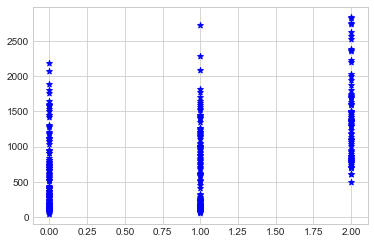

In [21]:
plt.scatter(df["Equipment Types"], df["PD Average"], c="b", marker="*")

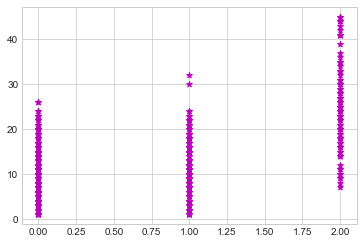

In [22]:
plt.scatter(df["Equipment Types"], df["PD Count"], c="m", marker="*")

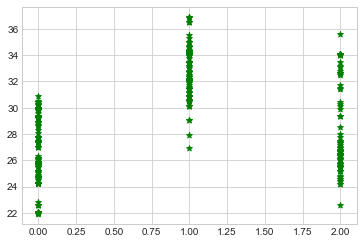

In [23]:
plt.scatter(df["Equipment Types"], df["Temperature"], c="g", marker="*")

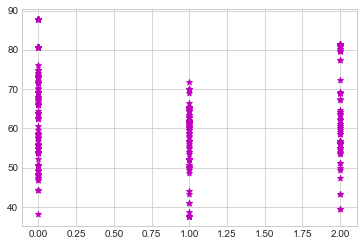

In [24]:
plt.scatter(df["Equipment Types"], df["Humidity"], c="m", marker="*")

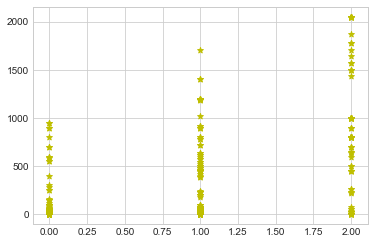

In [25]:
plt.scatter(df["Equipment Types"], df["Loading"], c="y", marker="*")

#### Conclusion

The data has no missing values, duplicated columns and all values are of integer or float values.
From the box plot, we can see that there are outliers in three of the columns, namely PD Average,
PD Count and Loading. From the histogram, we can say it is not normal for PD Average value close to
3000, for PD count value close to 60, for temperature below 22.5 or above 40, for humidity 
below 20 or above 90 and for Loading to be above 2500.

After removing the outliers, we proceed to calculate the correlation of all different parameters.
The results shows that all the correlation are above -0.1 or below 0.4 , meaning that the association between 
different parameters is small. The highest correlation value is 0.3277 between the PD Count and PD Average
parameter. Based on the skewness of >1, PD Average, PD Count, Loading parameter will have a better
measure using median rather than using mean. As for measuring the correlation with the Confidence
Interval and p-value, most are significance with small p-values meaning it is different from 0,
except for a few pairs.

Next, we understood the PD average and PD count can be affected(dependent) by other independent variables.
The regression results is to predict the dependent variable using the independent variable. Let 
the variables, Temperature, Humidity and Loading be x, y, and z , then PD Average be A(cap) and PD
Count be B(cap), where A(cap) = 5.529e-17 + 0.0651x + 0.054y + 0.2333z and B(cap) = -1.48e-17 +
0.0048x + -0.0399y + 0.2478z, based on the results.

Lastly, we scale the values and find the 3 different clusters of equipment types from different 
suppliers by using Kmeans clustering. From the scatter plot by comparing parameters from different types, 
we can see that the PD average, PD Count and Loading from Type 0 is highest, while the temperature from Type 2
is highest and the humidity from type 1 is highest. Since the PD average magnitude and PD count measures the 
equipment health, i would guess type 0 are the ones that need to be monitored with suspected unhealthy conditions.